In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


In [10]:
df=pd.read_csv("/content/blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [12]:
df.isnull().sum()

,0
Data,0
Labels,0


In [13]:
import nltk

In [14]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [15]:
file_path="/content/blogs.csv"
df=pd.read_csv(file_path)

In [16]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [20]:
words = df['Data'].apply(word_tokenize)

In [21]:
words

,Data
0,"[Path, :, cantaloupe.srv.cs.cmu.edu, !, magnes..."
1,"[Newsgroups, :, alt.atheism, Path, :, cantalou..."
2,"[Path, :, cantaloupe.srv.cs.cmu.edu, !, das-ne..."
3,"[Path, :, cantaloupe.srv.cs.cmu.edu, !, magnes..."
4,"[Xref, :, cantaloupe.srv.cs.cmu.edu, alt.athei..."
...,...
1995,"[Xref, :, cantaloupe.srv.cs.cmu.edu, talk.abor..."
1996,"[Xref, :, cantaloupe.srv.cs.cmu.edu, talk.reli..."
1997,"[Xref, :, cantaloupe.srv.cs.cmu.edu, talk.orig..."
1998,"[Xref, :, cantaloupe.srv.cs.cmu.edu, talk.reli..."


In [24]:
lower=words.apply(lambda x: [word.lower() for word in x])

In [25]:
lower

,Data
0,"[path, :, cantaloupe.srv.cs.cmu.edu, !, magnes..."
1,"[newsgroups, :, alt.atheism, path, :, cantalou..."
2,"[path, :, cantaloupe.srv.cs.cmu.edu, !, das-ne..."
3,"[path, :, cantaloupe.srv.cs.cmu.edu, !, magnes..."
4,"[xref, :, cantaloupe.srv.cs.cmu.edu, alt.athei..."
...,...
1995,"[xref, :, cantaloupe.srv.cs.cmu.edu, talk.abor..."
1996,"[xref, :, cantaloupe.srv.cs.cmu.edu, talk.reli..."
1997,"[xref, :, cantaloupe.srv.cs.cmu.edu, talk.orig..."
1998,"[xref, :, cantaloupe.srv.cs.cmu.edu, talk.reli..."


In [ ]:
import string


In [26]:
df['clean_words'] = lower.apply(lambda x: [word for word in x if word not in string.punctuation])

In [27]:
df[['Data', 'clean_words']].head()

,Data,clean_words
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,"[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl..."
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,"[newsgroups, alt.atheism, path, cantaloupe.srv..."
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,"[path, cantaloupe.srv.cs.cmu.edu, das-news.har..."
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,"[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl..."
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,"[xref, cantaloupe.srv.cs.cmu.edu, alt.atheism:..."


In [30]:
stop_words = set(stopwords.words('english'))
df['processed_words'] = df['clean_words'].apply(lambda x: [word for word in x if word not in stop_words])

In [31]:
df[['Data', 'clean_words', 'processed_words']].head()


,Data,clean_words,processed_words
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,"[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...","[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl..."
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,"[newsgroups, alt.atheism, path, cantaloupe.srv...","[newsgroups, alt.atheism, path, cantaloupe.srv..."
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,"[path, cantaloupe.srv.cs.cmu.edu, das-news.har...","[path, cantaloupe.srv.cs.cmu.edu, das-news.har..."
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,"[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...","[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl..."
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,"[xref, cantaloupe.srv.cs.cmu.edu, alt.atheism:...","[xref, cantaloupe.srv.cs.cmu.edu, alt.atheism:..."


In [32]:

df['lemmatized_words'] = df['processed_words'].apply(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])


In [33]:
df[['processed_words', 'lemmatized_words']].head()

,processed_words,lemmatized_words
0,"[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...","[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl..."
1,"[newsgroups, alt.atheism, path, cantaloupe.srv...","[newsgroups, alt.atheism, path, cantaloupe.srv..."
2,"[path, cantaloupe.srv.cs.cmu.edu, das-news.har...","[path, cantaloupe.srv.cs.cmu.edu, das-news.har..."
3,"[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...","[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl..."
4,"[xref, cantaloupe.srv.cs.cmu.edu, alt.atheism:...","[xref, cantaloupe.srv.cs.cmu.edu, alt.atheism:..."


In [52]:
df['final_text'] = df['lemmatized_words'].apply(lambda x: ' '.join(x))

In [53]:
df[['lemmatized_words', 'final_text']].head()

,lemmatized_words,final_text
0,"[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...",path cantaloupe.srv.cs.cmu.edu magnesium.club....
1,"[newsgroups, alt.atheism, path, cantaloupe.srv...",newsgroups alt.atheism path cantaloupe.srv.cs....
2,"[path, cantaloupe.srv.cs.cmu.edu, das-news.har...",path cantaloupe.srv.cs.cmu.edu das-news.harvar...
3,"[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...",path cantaloupe.srv.cs.cmu.edu magnesium.club....
4,"[xref, cantaloupe.srv.cs.cmu.edu, alt.atheism:...",xref cantaloupe.srv.cs.cmu.edu alt.atheism:534...


In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

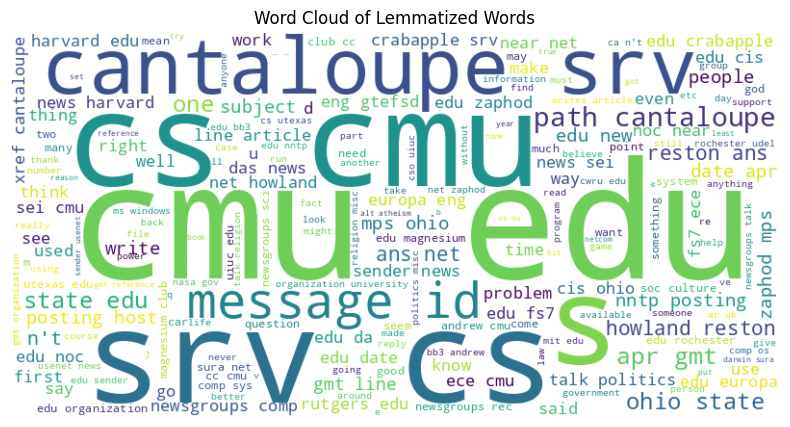

In [43]:
# Join all the lemmatized words into a single string
all_words = ' '.join([word for sublist in df['lemmatized_words'] for word in sublist])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lemmatized Words')
plt.show()

In [47]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [48]:
analyzer=SentimentIntensityAnalyzer()

In [54]:
df['sentiment']=df['final_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [55]:
df

,Data,Labels,clean_words,processed_words,lemmatized_words,final_text,sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,"[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...","[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...","[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...",path cantaloupe.srv.cs.cmu.edu magnesium.club....,-0.9927
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,"[newsgroups, alt.atheism, path, cantaloupe.srv...","[newsgroups, alt.atheism, path, cantaloupe.srv...","[newsgroups, alt.atheism, path, cantaloupe.srv...",newsgroups alt.atheism path cantaloupe.srv.cs....,0.8750
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,"[path, cantaloupe.srv.cs.cmu.edu, das-news.har...","[path, cantaloupe.srv.cs.cmu.edu, das-news.har...","[path, cantaloupe.srv.cs.cmu.edu, das-news.har...",path cantaloupe.srv.cs.cmu.edu das-news.harvar...,-0.9900
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,"[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...","[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...","[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...",path cantaloupe.srv.cs.cmu.edu magnesium.club....,-0.9996
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,"[xref, cantaloupe.srv.cs.cmu.edu, alt.atheism:...","[xref, cantaloupe.srv.cs.cmu.edu, alt.atheism:...","[xref, cantaloupe.srv.cs.cmu.edu, alt.atheism:...",xref cantaloupe.srv.cs.cmu.edu alt.atheism:534...,0.9890
...,...,...,...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,"[xref, cantaloupe.srv.cs.cmu.edu, talk.abortio...","[xref, cantaloupe.srv.cs.cmu.edu, talk.abortio...","[xref, cantaloupe.srv.cs.cmu.edu, talk.abortio...",xref cantaloupe.srv.cs.cmu.edu talk.abortion:1...,0.5511
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,"[xref, cantaloupe.srv.cs.cmu.edu, talk.religio...","[xref, cantaloupe.srv.cs.cmu.edu, talk.religio...","[xref, cantaloupe.srv.cs.cmu.edu, talk.religio...",xref cantaloupe.srv.cs.cmu.edu talk.religion.m...,0.9393
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,"[xref, cantaloupe.srv.cs.cmu.edu, talk.origins...","[xref, cantaloupe.srv.cs.cmu.edu, talk.origins...","[xref, cantaloupe.srv.cs.cmu.edu, talk.origins...",xref cantaloupe.srv.cs.cmu.edu talk.origins:41...,0.9339
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,"[xref, cantaloupe.srv.cs.cmu.edu, talk.religio...","[xref, cantaloupe.srv.cs.cmu.edu, talk.religio...","[xref, cantaloupe.srv.cs.cmu.edu, talk.religio...",xref cantaloupe.srv.cs.cmu.edu talk.religion.m...,0.9917


In [56]:
df['sentiment_label']=df['sentiment'].apply(lambda x: 'positive' if x>0 else ('negative' if x<0 else 'neutral'))

In [57]:
df.head()

,Data,Labels,clean_words,processed_words,lemmatized_words,final_text,sentiment,sentiment_label
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,"[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...","[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...","[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...",path cantaloupe.srv.cs.cmu.edu magnesium.club....,-0.9927,negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,"[newsgroups, alt.atheism, path, cantaloupe.srv...","[newsgroups, alt.atheism, path, cantaloupe.srv...","[newsgroups, alt.atheism, path, cantaloupe.srv...",newsgroups alt.atheism path cantaloupe.srv.cs....,0.8750,positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,"[path, cantaloupe.srv.cs.cmu.edu, das-news.har...","[path, cantaloupe.srv.cs.cmu.edu, das-news.har...","[path, cantaloupe.srv.cs.cmu.edu, das-news.har...",path cantaloupe.srv.cs.cmu.edu das-news.harvar...,-0.9900,negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,"[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...","[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...","[path, cantaloupe.srv.cs.cmu.edu, magnesium.cl...",path cantaloupe.srv.cs.cmu.edu magnesium.club....,-0.9996,negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,"[xref, cantaloupe.srv.cs.cmu.edu, alt.atheism:...","[xref, cantaloupe.srv.cs.cmu.edu, alt.atheism:...","[xref, cantaloupe.srv.cs.cmu.edu, alt.atheism:...",xref cantaloupe.srv.cs.cmu.edu alt.atheism:534...,0.9890,positive


In [63]:
df['sentiment_label'].value_counts()

,count
sentiment_label,
positive,1388
negative,581
neutral,31


In [82]:
sentiment_category_counts = df.groupby(['Labels', 'sentiment_label']).size().unstack(fill_value=0)
display(sentiment_category_counts)

sentiment_label,negative,neutral,positive
Labels,,,
alt.atheism,38,1,61
comp.graphics,10,2,88
comp.os.ms-windows.misc,22,2,76
comp.sys.ibm.pc.hardware,21,1,78
comp.sys.mac.hardware,19,3,78
comp.windows.x,21,2,77
misc.forsale,8,8,84
rec.autos,29,1,70
rec.motorcycles,29,1,70


In [64]:
Y=df['sentiment_label']
X=df['final_text']

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
m=TfidfVectorizer()
x_new=m.fit_transform(X)
x_new

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 326921 stored elements and shape (2000, 48693)>

In [73]:
x_new = pd.DataFrame(x_new)
x_new

,0,1,2,3,4,5,6,7,8,9,...,48683,48684,48685,48686,48687,48688,48689,48690,48691,48692
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.013838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,Y,test_size=0.2,random_state=42)

In [75]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [76]:
y_predict=model.predict(x_test)


In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [81]:
print("accuracy_score_test",accuracy_score(y_test,y_predict))
print("recall_score_test",recall_score(y_test,y_predict,average='weighted'))
print("precision_score_test",precision_score(y_test,y_predict,average='weighted'))

accuracy_score_test 0.675
recall_score_test 0.675
precision_score_test 0.455625


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [84]:
#My analysis of the sentiment_category_counts shows a general positive bias across most categories, with positive sentiment counts significantly higher than negative or neutral ones, such as 88 positive entries in comp.graphics and 93 in rec.sport.baseball. While negative sentiments are present in all categories, they are generally much lower, though alt.atheism and talk.religion.misc show relatively higher negative counts, indicating a more contentious tone. The neutral sentiment category consistently has minimal counts across all labels, suggesting that the texts tend to express a more definitive positive or negative emotion rather than remaining ambiguous.